In [1]:
state = 'WV' 
year = 2020

In [2]:
filepath = 'C:\\...
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [3]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 2 districts.


In [4]:
#warm_starts = [[[0, 4, 8, 17, 43, 66, 73, 81, 93], [1, 9, 13, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 48, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 68, 70, 74, 76, 78, 79, 84, 89, 91, 92], [5, 6, 7, 10, 11, 15, 29, 34, 45, 51, 61, 69, 75, 77, 80, 85, 88, 98], [2, 3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 56, 60, 67, 71, 72, 82, 83, 86, 87, 90, 94, 95, 96, 97]], [[3, 8, 12, 17, 38, 46, 48, 78, 93, 94, 95], [4, 6, 7, 10, 15, 16, 18, 29, 34, 36, 49, 50, 51, 56, 69, 75, 77, 83, 88], [0, 1, 2, 5, 9, 13, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 70, 71, 73, 74, 76, 79, 80, 81, 84, 86, 89, 91, 92, 96], [11, 24, 25, 26, 28, 39, 44, 45, 47, 54, 61, 67, 72, 82, 85, 87, 90, 97, 98]], [[4, 8, 17, 30, 32, 35, 37, 40, 43, 49, 52, 64, 66, 70, 73, 89], [1, 2, 9, 12, 14, 19, 20, 21, 22, 23, 26, 27, 31, 33, 38, 41, 42, 46, 53, 55, 58, 59, 60, 62, 63, 65, 68, 71, 76, 78, 79, 84, 86, 91, 92, 93, 96, 97], [0, 5, 6, 10, 13, 16, 18, 29, 34, 36, 45, 48, 50, 51, 57, 69, 74, 75, 77, 80, 81, 85, 88, 94, 95], [3, 7, 11, 15, 24, 25, 28, 39, 44, 47, 54, 56, 61, 67, 72, 82, 83, 87, 90, 98]], [[4, 8, 10, 17, 37, 53, 62, 93], [0, 1, 2, 9, 12, 14, 16, 18, 20, 21, 22, 23, 26, 27, 31, 33, 38, 41, 42, 43, 46, 48, 49, 50, 58, 59, 60, 63, 65, 66, 68, 71, 73, 76, 78, 79, 84, 86, 92, 94, 95, 96, 97], [5, 6, 13, 19, 29, 30, 32, 34, 35, 36, 40, 45, 51, 52, 55, 57, 64, 69, 70, 74, 75, 77, 80, 81, 85, 88, 89, 91], [3, 7, 11, 15, 24, 25, 28, 39, 44, 47, 54, 56, 61, 67, 72, 82, 83, 87, 90, 98]], [[2, 8, 21, 22, 27, 48, 53, 60, 68, 71, 76, 78, 79, 92, 93, 94], [0, 5, 7, 11, 13, 15, 30, 32, 34, 35, 36, 40, 43, 50, 52, 56, 57, 64, 69, 70, 72, 74, 77, 80, 81, 82, 87, 88, 89, 90, 91], [1, 4, 6, 9, 14, 16, 17, 19, 20, 23, 29, 31, 33, 37, 41, 42, 49, 51, 55, 58, 59, 62, 63, 65, 66, 73, 75, 84], [3, 10, 12, 18, 24, 25, 26, 28, 38, 39, 44, 45, 46, 47, 54, 61, 67, 83, 85, 86, 95, 96, 97, 98]], [[4, 8, 10, 17, 37, 53, 62, 93], [0, 1, 2, 6, 9, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 40, 41, 42, 43, 48, 49, 50, 52, 55, 58, 59, 60, 63, 64, 65, 66, 68, 70, 71, 73, 76, 78, 79, 81, 84, 89, 91, 92], [3, 18, 28, 34, 38, 45, 46, 54, 67, 75, 83, 85, 88, 94, 95, 98], [5, 7, 11, 12, 13, 15, 24, 25, 26, 29, 36, 39, 44, 47, 51, 56, 57, 61, 69, 72, 74, 77, 80, 82, 86, 87, 90, 96, 97]], [[4, 8, 10, 17, 37, 53, 62, 93], [6, 15, 25, 28, 34, 45, 47, 61, 72, 83, 85, 88, 98], [0, 5, 7, 11, 13, 16, 19, 29, 30, 32, 35, 36, 40, 43, 49, 50, 51, 52, 55, 56, 57, 63, 64, 66, 69, 70, 73, 74, 75, 77, 80, 81, 82, 87, 89, 90, 91], [1, 2, 3, 9, 12, 14, 18, 20, 21, 22, 23, 24, 26, 27, 31, 33, 38, 39, 41, 42, 44, 46, 48, 54, 58, 59, 60, 65, 67, 68, 71, 76, 78, 79, 84, 86, 92, 94, 95, 96, 97]], [[4, 8, 10, 17, 18, 46, 48, 78, 94], [3, 12, 24, 25, 26, 38, 39, 44, 47, 54, 60, 67, 68, 71, 72, 76, 86, 87, 93, 96, 97, 98], [6, 7, 11, 13, 15, 28, 29, 34, 45, 51, 56, 61, 69, 75, 77, 80, 82, 83, 85, 88, 90, 95], [0, 1, 2, 5, 9, 14, 16, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 43, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 70, 73, 74, 79, 81, 84, 89, 91, 92]], [[2, 8, 10, 16, 18, 38, 46, 48, 60, 68, 71, 76, 78, 94, 95], [0, 1, 4, 9, 14, 17, 19, 20, 21, 22, 23, 27, 31, 33, 37, 41, 42, 43, 49, 50, 52, 53, 55, 58, 59, 62, 65, 66, 73, 79, 84, 92, 93], [5, 6, 7, 11, 13, 29, 30, 32, 34, 35, 36, 40, 45, 51, 56, 57, 63, 64, 69, 70, 74, 75, 77, 80, 81, 85, 88, 89, 90, 91], [3, 12, 15, 24, 25, 26, 28, 39, 44, 47, 54, 61, 67, 72, 82, 83, 86, 87, 96, 97, 98]], [[2, 8, 12, 21, 22, 41, 46, 48, 60, 68, 71, 76, 78, 86, 93, 94, 96], [6, 7, 11, 15, 29, 34, 45, 50, 51, 56, 61, 72, 75, 77, 82, 83, 85, 87, 88, 90], [3, 4, 10, 16, 18, 24, 25, 26, 28, 38, 39, 44, 47, 54, 67, 95, 97, 98], [0, 1, 5, 9, 13, 14, 17, 19, 20, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 69, 70, 73, 74, 79, 80, 81, 84, 89, 91, 92]], [[2, 3, 8, 12, 38, 46, 48, 54, 60, 67, 68, 71, 76, 78, 83, 86, 94, 95, 96], [15, 24, 25, 26, 39, 44, 47, 61, 72, 88, 97, 98], [4, 5, 6, 7, 10, 11, 13, 16, 18, 28, 29, 34, 36, 45, 51, 56, 57, 64, 69, 74, 75, 77, 80, 81, 82, 85, 87, 90], [0, 1, 9, 14, 17, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 49, 50, 52, 53, 55, 58, 59, 62, 63, 65, 66, 70, 73, 79, 84, 89, 91, 92, 93]], [[1, 2, 8, 20, 21, 22, 27, 41, 53, 59, 60, 71, 79, 92, 93], [3, 12, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 68, 76, 78, 83, 86, 94, 95, 96, 97, 98], [0, 4, 5, 9, 10, 14, 16, 17, 18, 19, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 52, 55, 57, 58, 62, 63, 64, 65, 66, 70, 73, 74, 81, 84, 89, 91], [6, 7, 11, 13, 15, 29, 34, 45, 50, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90]], [[4, 6, 8, 10, 16, 18, 93], [5, 7, 11, 13, 15, 34, 45, 51, 56, 61, 69, 72, 74, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 21, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 60, 67, 68, 71, 76, 78, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 17, 19, 20, 22, 23, 27, 29, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 43, 49, 50, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 70, 73, 79, 81, 84, 89, 91, 92]], [[4, 6, 8, 10, 16, 18, 93], [5, 7, 11, 13, 15, 29, 34, 50, 51, 56, 61, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 21, 24, 25, 26, 28, 38, 39, 44, 45, 46, 47, 48, 54, 60, 67, 71, 76, 78, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 17, 19, 20, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 43, 49, 52, 53, 55, 57, 58, 59, 62, 63, 64, 65, 66, 68, 70, 73, 74, 79, 81, 84, 89, 91, 92]], [[1, 2, 8, 14, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [0, 4, 9, 16, 17, 19, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 66, 70, 73, 74, 81, 89, 91, 93], [3, 6, 10, 12, 13, 18, 24, 26, 28, 29, 34, 38, 39, 44, 45, 46, 48, 54, 67, 75, 83, 85, 86, 94, 95, 96, 97, 98], [5, 7, 11, 15, 25, 47, 51, 56, 61, 69, 72, 77, 80, 82, 87, 88, 90]], [[0, 4, 8, 10, 16, 17, 18, 43, 49, 50, 66], [1, 2, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 36, 37, 40, 41, 42, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 70, 71, 73, 74, 79, 81, 84, 89, 91, 92, 93], [3, 12, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 68, 76, 78, 83, 86, 94, 95, 96, 97, 98], [5, 6, 7, 11, 13, 15, 29, 34, 45, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90]], [[1, 2, 8, 14, 20, 21, 22, 27, 41, 59, 60, 65, 68, 71, 76, 78, 79, 84, 92], [3, 10, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 48, 54, 61, 67, 83, 86, 94, 95, 96, 97, 98], [0, 4, 9, 16, 17, 19, 23, 30, 31, 32, 33, 35, 36, 37, 40, 42, 43, 49, 50, 52, 53, 55, 57, 58, 62, 63, 64, 66, 70, 73, 74, 81, 89, 91, 93], [5, 6, 7, 11, 13, 15, 29, 34, 45, 51, 56, 69, 72, 75, 77, 80, 82, 85, 87, 88, 90]], [[4, 6, 8, 10, 16, 17, 49, 93], [5, 7, 11, 13, 15, 29, 34, 36, 45, 50, 51, 56, 69, 74, 75, 77, 80, 82, 85, 87, 88, 90], [3, 12, 18, 24, 25, 26, 28, 38, 39, 44, 46, 47, 54, 61, 67, 72, 83, 86, 94, 95, 96, 97, 98], [0, 1, 2, 9, 14, 19, 20, 21, 22, 23, 27, 30, 31, 32, 33, 35, 37, 40, 41, 42, 43, 48, 52, 53, 55, 57, 58, 59, 60, 62, 63, 64, 65, 66, 68, 70, 71, 73, 76, 78, 79, 81, 84, 89, 91, 92]]]

In [5]:
obj_type = 'average_Polsby_Popper'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = None                # if you have user define warm strats else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [6]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking, 
        )

Running epsilon constraint method for state WV, objective average_Polsby_Popper
####################################################################################################

L = 887890 and U = 905826

****************************************
Trying deviation = 8968.58
****************************************
No valid warm start used.

****************************************
Running labeling model!
****************************************
L = 887890 and U = 905826
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (1

H 2550   535                       0.2150230    0.30839  43.4%  79.4   24s
H 2550   535                       0.2150235    0.30839  43.4%  79.4   24s
  2639   539    0.23421   47   58    0.21502    0.30839  43.4%  78.0   25s
H 3159   609                       0.2278309    0.24964  9.57%  74.1   25s
* 3296   609              47       0.2348623    0.24964  6.29%  72.9   25s
H 3375   536                       0.2387686    0.24964  4.55%  72.2   25s
H 3398   536                       0.2394733    0.24964  4.25%  72.0   25s
H 3655   399                       0.2394748    0.24928  4.10%  68.6   26s

Cutting planes:
  Gomory: 5
  MIR: 27
  Flow cover: 13
  Inf proof: 13
  Zero half: 6
  RLT: 25
  Relax-and-lift: 1
  Lazy constraints: 23

Explored 4550 nodes (266776 simplex iterations) in 26.60 seconds (5.32 work units)
Thread count was 20 (of 20 available processors)

Solution count 8: 0.239475 0.239473 0.238769 ... 0.214966
No other solutions better than 0.239475

Optimal solution found (tol

Model fingerprint: 0x8288203c
Model has 2 quadratic constraints
Variable types: 376 continuous, 1010 integer (1010 binary)
Coefficient statistics:
  Matrix range     [1e-06, 2e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-07, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]
Presolve removed 938 rows and 650 columns
Presolve time: 0.02s
Presolved: 813 rows, 736 columns, 3060 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 46 continuous, 690 integer (690 binary)

Root relaxation: objective 9.999990e-01, 264 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   18          -    1.00000      -     -    0s
     0     0    0.97589    0   74          -    0.97589      -     -    0s
     0     0    0.97376    0   81          -    0.97376      -     -    0s
    

     0     0    0.86035    0  196          -    0.86035      -     -    3s
     0     0    0.85999    0  210          -    0.85999      -     -    3s
     0     0    0.85518    0  184          -    0.85518      -     -    4s
     0     0    0.85492    0  182          -    0.85492      -     -    4s
     0     0    0.85489    0  182          -    0.85489      -     -    4s
     0     2    0.85489    0  182          -    0.85489      -     -    6s
   568   414    0.44560   15  182          -    0.48191      -   117   10s
H  750   473                       0.1094694    0.36904   237%   122   14s
H  757   471                       0.1094923    0.36904   237%   122   15s
H  757   452                       0.1094956    0.36904   237%   122   15s
H  757   434                       0.1426902    0.36904   159%   122   15s
H  768   413                       0.1584830    0.36904   133%   121   15s
H  868   404                       0.1585159    0.36904   133%   112   15s
H  969   392             

Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter LazyConstraints to value 1
Set parameter MIPGap to value 0
Set parameter FeasibilityTol to value 1e-07
Set parameter TimeLimit to value 7200
Set parameter IntFeasTol to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1751 rows, 1386 columns and 5779 nonzeros
Model fingerprint: 0x4e796511
Model has 2 quadratic constraints
Variable types: 376 continuous, 1010 integer (1010 binary)
Coefficient statistics:
  Matrix range     [1e-06, 2e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-07, 3e-01]
  Bounds range     [1e+00,


Non-default parameters:
TimeLimit  7200
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  0
LazyConstraints  1

Optimize a model with 1751 rows, 1386 columns and 5779 nonzeros
Model fingerprint: 0xb9a41560
Model has 2 quadratic constraints
Variable types: 376 continuous, 1010 integer (1010 binary)
Coefficient statistics:
  Matrix range     [1e-06, 2e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [5e-07, 3e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+05]
Presolve removed 938 rows and 650 columns
Presolve time: 0.03s
Presolved: 813 rows, 736 columns, 3060 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 46 continuous, 690 integer (690 binary)

Root relaxation: objective 9.999990e-01, 257 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   18          -    1.0000

Presolved: 813 rows, 736 columns, 3060 nonzeros
Presolved model has 2 quadratic constraint(s)
Variable types: 46 continuous, 690 integer (690 binary)

Root relaxation: objective 9.999990e-01, 257 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    1.00000    0   18          -    1.00000      -     -    0s
     0     0    0.97587    0   81          -    0.97587      -     -    0s
     0     0    0.97278    0   84          -    0.97278      -     -    0s
     0     0    0.91850    0   98          -    0.91850      -     -    0s
     0     0    0.91193    0  121          -    0.91193      -     -    0s
     0     0    0.89321    0  138          -    0.89321      -     -    1s
     0     0    0.88524    0  145          -    0.88524      -     -    1s
     0     0    0.88176    0  161          -    0.88176      -     -    1s
     0   

H445070  2859                       0.1813312    0.18344  1.17%  32.7  313s
H445187  2590                       0.1816096    0.18344  1.01%  32.7  313s
 447194  1718     cutoff   39         0.18161    0.18328  0.92%  32.7  315s
H449803   873                       0.1816168    0.18293  0.72%  32.7  316s

Cutting planes:
  Lazy constraints: 21

Explored 452953 nodes (14766015 simplex iterations) in 318.57 seconds (72.84 work units)
Thread count was 20 (of 20 available processors)

Solution count 10: 0.181617 0.18161 0.181331 ... 0.180968
No other solutions better than 0.181617

Optimal solution found (tolerance 0.00e+00)
Best objective 1.816167831421e-01, best bound 1.816167831421e-01, gap 0.0000%

User-callback calls 921129, time in user-callback 7.12 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[0, 1, 2, 6, 9, 13, 15, 17, 19, 20, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36, 42, 45, 49, 50, 54], [3, 4, 5, 7, 

H281402 15517                       0.1795001    0.19230  7.13%  34.4  244s
H281602 14673                       0.1797137    0.19230  7.00%  34.4  244s
 283359 14387     cutoff   62         0.17971    0.19230  7.00%  34.4  246s
H283360 14386                       0.1797156    0.19230  7.00%  34.4  246s
H283500 13598                       0.1809649    0.19230  6.26%  34.4  246s
H284371 13596                       0.1809669    0.19230  6.26%  34.5  246s
H284706 13061                       0.1809998    0.19230  6.24%  34.5  247s
H284845 13058                       0.1810050    0.19230  6.24%  34.5  247s
H287171 13057                       0.1810074    0.19230  6.24%  34.5  248s
H287385 12529                       0.1810112    0.19230  6.24%  34.5  249s
H287552 12529                       0.1810126    0.19230  6.23%  34.5  249s
H287673 12528                       0.1810131    0.19230  6.23%  34.5  249s
 290097 11874     cutoff   49         0.18101    0.19230  6.23%  34.5  251s
 296027  985

H104772 22408                       0.1760473    0.21670  23.1%  42.8  118s
H105367 22394                       0.1763844    0.21669  22.9%  42.7  118s
H106389 22016                       0.1784477    0.21669  21.4%  42.6  118s
 108709 22909    0.18726   39   31    0.17845    0.21649  21.3%  42.3  121s
 115868 24142 infeasible   53         0.17845    0.21612  21.1%  41.2  125s
 124121 25184    0.21368   39  109    0.17845    0.21564  20.8%  40.3  132s
 127148 25600 infeasible   36         0.17845    0.21543  20.7%  39.9  135s
 131581 26238    0.21452   31   57    0.17845    0.21513  20.6%  39.4  140s
 139428 26622 infeasible   42         0.17845    0.21469  20.3%  38.7  146s
 143607 26896    0.19393   46   34    0.17845    0.21434  20.1%  38.4  151s
 149874 27110    0.19740   53   77    0.17845    0.21401  19.9%  37.8  155s
 158747 26999    0.20753   39   59    0.17845    0.21334  19.6%  37.2  162s
 164296 26691    0.19756   32   65    0.17845    0.21274  19.2%  36.9  165s
 170478 2659

     0     0    0.88065    0  225          -    0.88065      -     -    1s
     0     0    0.88036    0  228          -    0.88036      -     -    1s
     0     0    0.87725    0  189          -    0.87725      -     -    1s
     0     0    0.87694    0  233          -    0.87694      -     -    1s
     0     0    0.87683    0  242          -    0.87683      -     -    2s
     0     2    0.87680    0  242          -    0.87680      -     -    2s
   707   509    0.16452   41  133          -    0.87334      -  65.5    5s
   721   518    0.69976    8  200          -    0.69976      -  64.2   10s
   732   526    0.69638   10  214          -    0.69638      -  63.3   15s
   741   532    0.69239    7  244          -    0.69239      -  62.5   20s
   767   549    0.68909   21  292          -    0.68909      -  60.4   25s
   786   563    0.68892   15  293          -    0.68892      -  79.8   30s
   802   582    0.68598   27  153          -    0.68819      -  89.0   35s
  2004   854 infeasible  

 551567 110255 infeasible   55               -    0.18750      -  46.6  516s
 555073 111361    0.05592   68   20          -    0.18750      -  46.6  521s
 559189 112867    0.14904   56   88          -    0.18750      -  46.7  526s
 563740 114080    0.18573   45   26          -    0.18750      -  46.7  530s
 566822 115311    0.18611   48   98          -    0.18750      -  46.8  536s
 569216 116432    0.18672   59   51          -    0.18750      -  46.8  540s
 573993 117827    0.18534   56   51          -    0.18750      -  46.9  546s
 576818 119109    0.18718   72   44          -    0.18750      -  46.9  550s
 582651 120541    0.18749   54   42          -    0.18749      -  46.9  556s
 585277 121197    0.18639   50   50          -    0.18749      -  46.9  560s
 589911 122210    0.17744   55   41          -    0.18749      -  46.9  565s
 594288 123513    0.18685   68   28          -    0.18748      -  47.0  571s
 598411 125122    0.18733   39   14          -    0.18748      -  47.0  575s

 996876 211404    0.18161   60   58          -    0.18353      -  46.2 1050s
 1001544 211804    0.18193   56   32          -    0.18348      -  46.2 1055s
 1006385 212315    0.15590   45   26          -    0.18340      -  46.2 1061s
 1010345 212804 infeasible   56               -    0.18334      -  46.2 1065s
 1014704 213292    0.13563   59   48          -    0.18327      -  46.2 1071s
 1020220 214019    0.13114   46   70          -    0.18318      -  46.1 1075s
 1024723 215017 infeasible   61               -    0.18310      -  46.1 1080s
 1030312 215684    0.17959   54  100          -    0.18302      -  46.1 1085s
 1033315 216458    0.17965   52   39          -    0.18295      -  46.1 1090s
 1037200 216881    0.14818   48  115          -    0.18287      -  46.1 1095s
 1043762 217282    0.17573   64   52          -    0.18271      -  46.0 1100s
 1049825 217446 infeasible   60               -    0.18261      -  46.0 1105s
 1052851 217846    0.16758   42  135          -    0.18248      -

 1426689 280291    0.14059   55   39          -    0.17854      -  45.3 1580s
 1429452 280875    0.16282   48   49          -    0.17851      -  45.3 1585s
 1433421 281660    0.16520   54   47          -    0.17846      -  45.3 1590s
 1436264 282134    0.17560   41   90          -    0.17843      -  45.3 1596s
 1440423 283038 infeasible   63               -    0.17837      -  45.3 1601s
 1443943 283724    0.14429   65   27          -    0.17831      -  45.3 1606s
 1446637 284270    0.17577   65   26          -    0.17828      -  45.3 1610s
 1450212 284853 infeasible   43               -    0.17824      -  45.2 1615s
 1453549 285278 infeasible   52               -    0.17819      -  45.2 1620s
 1458693 286321    0.16352   65   63          -    0.17811      -  45.2 1626s
 1462160 286773 infeasible   63               -    0.17806      -  45.2 1631s
 1467362 287696    0.17734   61   89          -    0.17798      -  45.2 1636s
 1470147 288290    0.17215   68   18          -    0.17794      

 1784735 308788 infeasible   67               -    0.17342      -  44.2 2110s
 1787649 308770    0.14738   59   19          -    0.17334      -  44.2 2115s
 1792623 308697 infeasible   64               -    0.17325      -  44.2 2120s
 1793758 308771 infeasible   51               -    0.17322      -  44.2 2125s
 1798866 308584 infeasible   65               -    0.17309      -  44.1 2133s
 1801719 308536    0.16011   52  114          -    0.17302      -  44.1 2136s
 1803270 308646 infeasible   70               -    0.17299      -  44.1 2140s
 1807243 308162 infeasible   60               -    0.17289      -  44.1 2146s
 1812753 307884    0.15807   54   72          -    0.17278      -  44.1 2150s
 1816614 307389    0.16208   53   29          -    0.17264      -  44.1 2156s
 1818229 307375    0.17241   56   25          -    0.17256      -  44.0 2160s
 1822462 307153 infeasible   60               -    0.17244      -  44.0 2166s
 1827168 307114 infeasible   79               -    0.17232      

 2082209 365479    0.17119   57   33          -    0.17183      -  44.3 2640s
 2085958 366177 infeasible   59               -    0.17182      -  44.4 2646s
 2088629 366789 infeasible   48               -    0.17182      -  44.4 2650s
 2091651 367371    0.16531   48   49          -    0.17182      -  44.4 2656s
 2094264 368148    0.16403   51   99          -    0.17182      -  44.4 2662s
 2095893 368461    0.16718   55  129          -    0.17182      -  44.4 2665s
 2098698 369074    0.16827   63   30          -    0.17182      -  44.4 2671s
 2101564 369507    0.16927   63   69          -    0.17181      -  44.4 2677s
 2103031 369661 infeasible   56               -    0.17181      -  44.4 2680s
 2106026 370410 infeasible   59               -    0.17181      -  44.4 2687s
 2107677 370681    0.15603   58   21          -    0.17180      -  44.4 2690s
 2110455 371308    0.16801   58   17          -    0.17180      -  44.4 2697s
 2112450 371710    0.09373   65   21          -    0.17179      

 2380262 427984    0.15428   67   38          -    0.17073      -  44.1 3172s
 2382445 428302 infeasible   59               -    0.17072      -  44.1 3175s
 2385232 428771    0.16736   58   65          -    0.17070      -  44.1 3180s
 2389174 429628    0.15961   53   93          -    0.17067      -  44.1 3186s
 2391951 430227    0.13962   53  133          -    0.17065      -  44.1 3191s
 2395839 430946    0.09821   64   31          -    0.17063      -  44.0 3196s
 2399031 431517 infeasible   66               -    0.17060      -  44.0 3201s
 2402269 432251    0.16979   65   21          -    0.17057      -  44.0 3206s
 2404201 432606    0.17049   50   79          -    0.17055      -  44.0 3210s
 2408027 433122    0.14760   59   61          -    0.17053      -  44.0 3216s
 2409232 433545 infeasible   53               -    0.17052      -  44.0 3220s
 2413219 434255 infeasible   51               -    0.17048      -  44.0 3227s
 2414960 434497 infeasible   61               -    0.17046      

 2690022 463032 infeasible   52               -    0.16792      -  43.7 3701s
 2692586 463198 infeasible   56               -    0.16792      -  43.8 3705s
 2696315 463388 infeasible   59               -    0.16792      -  43.8 3710s
 2699357 463661 infeasible   55               -    0.16791      -  43.8 3715s
 2702697 463934    0.16590   62   20          -    0.16791      -  43.8 3720s
 2705168 464099    0.16253   58   66          -    0.16791      -  43.8 3726s
 2707983 464542    0.16790   55   27          -    0.16791      -  43.8 3734s
 2709709 464607    0.15834   66   51          -    0.16790      -  43.8 3737s
 2711079 464949 infeasible   57               -    0.16789      -  43.8 3742s
 2713333 465176    0.16784   62   21          -    0.16787      -  43.8 3746s
 2715193 465231    0.16400   53   31          -    0.16786      -  43.8 3750s
 2716584 465464    0.16133   60   15          -    0.16785      -  43.8 3755s
 2720491 465727 infeasible   69               -    0.16783      

 2938590 478721    0.16542   64   32          -    0.16568      -  43.3 4238s
 2940981 478704 infeasible   59               -    0.16566      -  43.3 4242s
 2942368 478806 infeasible   68               -    0.16564      -  43.2 4246s
 2944756 478939    0.13948   66   21          -    0.16561      -  43.2 4251s
 2946674 478880 infeasible   59               -    0.16559      -  43.2 4255s
 2948115 478865 infeasible   63               -    0.16556      -  43.2 4261s
 2951361 478907    0.13434   57   76          -    0.16552      -  43.2 4265s
 2954879 478884    0.10114   55   15          -    0.16547      -  43.2 4272s
 2957358 478844    0.13939   54   67          -    0.16544      -  43.2 4276s
 2958873 478867    0.14805   60   99          -    0.16542      -  43.2 4280s
 2961176 478948    0.14296   73   42          -    0.16538      -  43.2 4285s
 2964117 479036    0.15033   59   87          -    0.16535      -  43.2 4290s
 2966824 479287    0.15967   55   25          -    0.16531      

 3212421 512507    0.16132   60   15          -    0.16403      -  43.2 4777s
 3214305 512723    0.16403   58   52          -    0.16403      -  43.2 4780s
 3217298 513448 infeasible   61               -    0.16403      -  43.2 4785s
 3220507 514158    0.14871   64   32          -    0.16403      -  43.2 4792s
 3222809 514280 infeasible   59               -    0.16403      -  43.2 4795s
 3225282 514889 infeasible   55               -    0.16403      -  43.2 4801s
 3228179 515565    0.16236   54  114          -    0.16403      -  43.2 4807s
 3230285 515864    0.16333   60   48          -    0.16403      -  43.2 4810s
 3233366 516791    0.13929   69   47          -    0.16403      -  43.2 4816s
 3236700 517265 infeasible   59               -    0.16403      -  43.2 4820s
 3240163 517948 infeasible   53               -    0.16403      -  43.2 4825s
 3242760 518414    0.15853   53   61          -    0.16403      -  43.2 4830s
 3246156 518620 infeasible   63               -    0.16402      

 3516777 568212 infeasible   56               -    0.16371      -  43.3 5306s
 3521025 568718 infeasible   60               -    0.16371      -  43.2 5312s
 3524297 569497    0.15686   48   52          -    0.16370      -  43.2 5317s
 3526447 569973    0.16338   47   65          -    0.16369      -  43.2 5320s
 3529752 570690    0.15550   64   17          -    0.16368      -  43.2 5326s
 3532011 571171    0.13238   61   37          -    0.16368      -  43.2 5330s
 3535786 571822    0.15613   56   57          -    0.16367      -  43.2 5336s
 3538116 572364    0.13204   58   38          -    0.16366      -  43.2 5340s
 3542061 572991 infeasible   64               -    0.16365      -  43.2 5347s
 3543471 573403    0.15605   62   26          -    0.16365      -  43.2 5350s
 3547704 573924    0.16011   55   69          -    0.16363      -  43.2 5357s
 3549092 574402    0.15439   74   38          -    0.16363      -  43.2 5360s
 3553538 575141    0.15086   67   33          -    0.16362      

 3813066 616050    0.15987   65   19          -    0.16249      -  42.8 5836s
 3815428 616499    0.16006   58   19          -    0.16248      -  42.8 5840s
 3819475 617135 infeasible   64               -    0.16246      -  42.8 5846s
 3824189 617807 infeasible   63               -    0.16244      -  42.8 5852s
 3826305 617907    0.14803   54   59          -    0.16242      -  42.8 5855s
 3830215 618581 infeasible   58               -    0.16240      -  42.8 5861s
 3833563 619061    0.09652   54   58          -    0.16238      -  42.8 5867s
 3835963 619461    0.13455   57   33          -    0.16236      -  42.8 5870s
 3839741 619716    0.15271   66   88          -    0.16234      -  42.8 5875s
 3843348 620196    0.13054   49   75          -    0.16231      -  42.8 5881s
 3848254 620651    0.15807   43   28          -    0.16228      -  42.7 5887s
 3851739 621280    0.09975   59    9          -    0.16226      -  42.7 5892s
 3854227 621521    0.13212   57   73          -    0.16224      

 4196797 647445    0.15605   62   33          -    0.16013      -  42.3 6365s
 4201779 648196    0.15988   57   40          -    0.16012      -  42.3 6371s
 4204807 648498    0.15991   59   56          -    0.16012      -  42.3 6375s
 4208634 648770 infeasible   67               -    0.16012      -  42.3 6381s
 4212322 649271 infeasible   63               -    0.16012      -  42.4 6385s
 4215834 649901    0.15612   58   57          -    0.16012      -  42.4 6390s
 4220051 650226    0.09905   53   44          -    0.16012      -  42.4 6396s
 4222871 650379    0.14140   63   69          -    0.16012      -  42.4 6400s
 4226488 650625    0.15673   65   23          -    0.16012      -  42.4 6405s
 4230457 651207 infeasible   65               -    0.16012      -  42.4 6411s
 4233721 651164    0.15379   64   33          -    0.16012      -  42.4 6415s
 4238413 651876 infeasible   57               -    0.16011      -  42.4 6421s
 4241255 652121    0.16004   52   28          -    0.16011      

 4600756 680114    0.14161   68   12          -    0.15863      -  42.0 6895s
 4605006 680442 infeasible   51               -    0.15861      -  42.0 6900s
 4608471 681016    0.15372   57   52          -    0.15859      -  42.0 6905s
 4612081 681552    0.15741   58   72          -    0.15857      -  42.0 6911s
 4616824 681827    0.15625   62   38          -    0.15855      -  42.0 6917s
 4620877 682134    0.12574   70   22          -    0.15853      -  42.0 6922s
 4622492 682406    0.13710   64   52          -    0.15852      -  42.0 6925s
 4626421 682703 infeasible   60               -    0.15849      -  42.0 6930s
 4631909 682894 infeasible   70               -    0.15846      -  42.0 6936s
 4636030 683412    0.14915   64   41          -    0.15844      -  42.0 6942s
 4639845 683662 infeasible   67               -    0.15842      -  42.0 6947s
 4643792 683949    0.13110   60   49          -    0.15839      -  42.0 6952s
 4646381 684277 infeasible   58               -    0.15838      

In [7]:
result = list(zip(plans, obj_bounds , deviations))

In [8]:
if state == "ME":
    infeasible_region = [0, 750]
elif  state == "NM":
    infeasible_region = [0, 1354]
else:
    infeasible_region = None

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]


####################################################################################################
Pareto Frontier for state WV,  objective average_Polsby_Popper
####################################################################################################

Pareto front plans: [[[0, 1, 2, 5, 13, 17, 18, 19, 20, 22, 23, 26, 28, 29, 31, 33, 34, 36, 45, 46, 49, 50, 52, 54], [3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 21, 24, 25, 27, 30, 32, 35, 37, 38, 39, 40, 41, 42, 43, 44, 47, 48, 51, 53]], [[0, 1, 2, 4, 6, 8, 9, 10, 13, 15, 17, 18, 20, 22, 23, 26, 28, 29, 30, 31, 33, 34, 43, 45, 49, 50, 52, 54], [3, 5, 7, 11, 12, 14, 16, 19, 21, 24, 25, 27, 32, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 51, 53]], [[0, 1, 2, 6, 9, 13, 15, 17, 19, 20, 22, 23, 26, 27, 28, 29, 31, 33, 34, 36, 42, 45, 49, 50, 54], [3, 4, 5, 7, 8, 10, 11, 12, 14, 16, 18, 21, 24, 25, 30, 32, 35, 37, 38, 39, 40, 41, 43, 44, 46, 47, 48, 51, 52, 53]], [[0, 2, 4, 6, 7, 9, 13, 17, 19, 22, 23, 26, 28, 29, 31, 33, 34, 

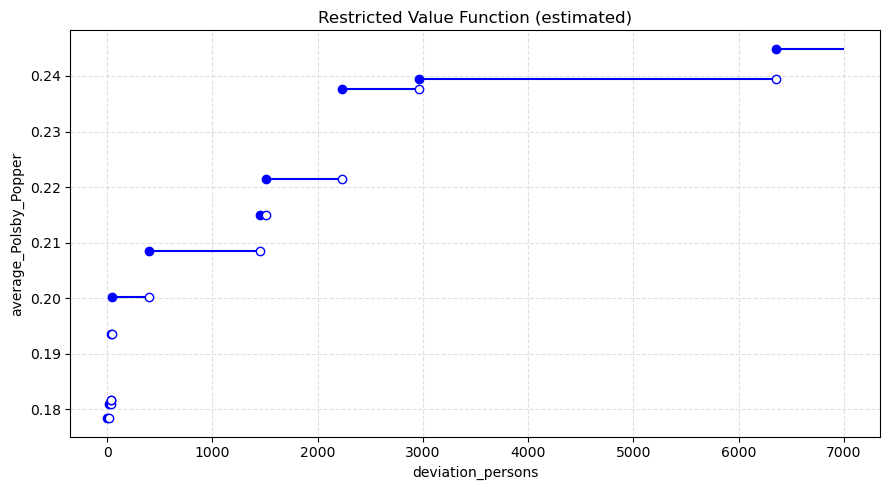

In [10]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
            
        # Add the plan and its objective values to the Pareto frontier
        pareto.add_plan(plan, upper_bound, lower_bound)
            
# Print the Pareto frontier plans and objective values
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds)
    
#extra_points: list of tuples, each containing (deviation, objective_value, label)
if state == 'WV' and year == 2010:
    
    #2010 enacted map scores
    enacted_map_deviation = 3197.333333333372
    enacted_map_scores = {'inverse_Polsby_Popper': 7.75, 'cut_edges': 68.00, 
                                      'perimeter': 42.12, 'average_Polsby_Popper': 0.14,'bottleneck_Polsby_Popper': 0.10}
    # Cooper plan 1
    Cooper_plan_1_deviation = 323.66666666662786
    Cooper_plan_1_scores = {'inverse_Polsby_Popper': 7.31, 'cut_edges': 68.00, 
                                      'perimeter': 40.53, 'average_Polsby_Popper': 0.17,'bottleneck_Polsby_Popper': 0.10}
    # Cooper plan 2
    Cooper_plan_2_deviation = 232.66666666662786
    Cooper_plan_2_scores = {'inverse_Polsby_Popper': 8.18, 'cut_edges': 72.00, 
                                      'perimeter': 43.36, 'average_Polsby_Popper': 0.16,'bottleneck_Polsby_Popper': 0.09}
    # Cooper plan 3
    Cooper_plan_3_deviation = 115.66666666662786
    Cooper_plan_3_scores = {'inverse_Polsby_Popper': 7.25, 'cut_edges': 70.00, 
                                      'perimeter': 40.65, 'average_Polsby_Popper': 0.16,'bottleneck_Polsby_Popper': 0.09}
    extra_points = [
                (enacted_map_deviation,  enacted_map_scores[obj_type], 'Enacted Map'),
                (Cooper_plan_1_deviation,  Cooper_plan_1_scores[obj_type] , 'Cooper plan 1'),
                (Cooper_plan_2_deviation,  Cooper_plan_2_scores[obj_type], 'Cooper plan 2'),
                (Cooper_plan_3_deviation, Cooper_plan_3_scores[obj_type], 'Cooper plan 3'),
                        ]
    
    #extra_colors: list of colors corresponding to the points in extra_points
    extra_colors = ['r', 'g', 'c', 'y']  # Red, Green, Cyan, Yellow for each of the extra points
    
    for ep in extra_points:
        print(f"The {ep[2]} has an objective value of {ep[1]} and a deviation of {ep[0]}.")
else:
    extra_points = None
    extra_colors = None
        
pareto.tighten_lower_bounds()
    
if infeasible_region != None:
        
    # Get the max values for setting the limits
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_ce = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[0, max_dev+100]
    o2lim=[0, max_ce*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(splits=None,o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region, extra_points=extra_points, extra_colors=extra_colors)  


####################################################################################################
Pareto maps for state WV,  objective average_Polsby_Popper
####################################################################################################



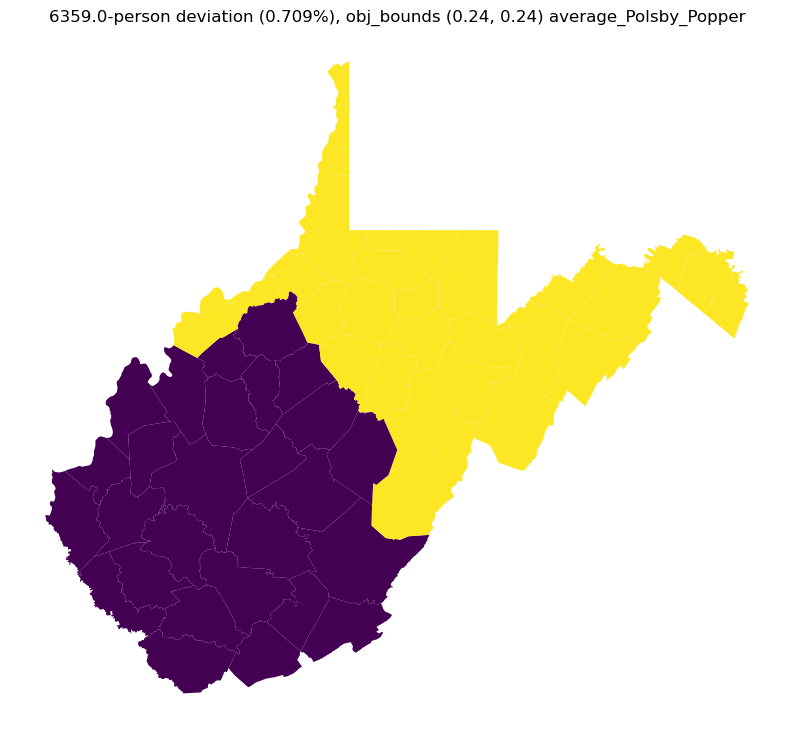

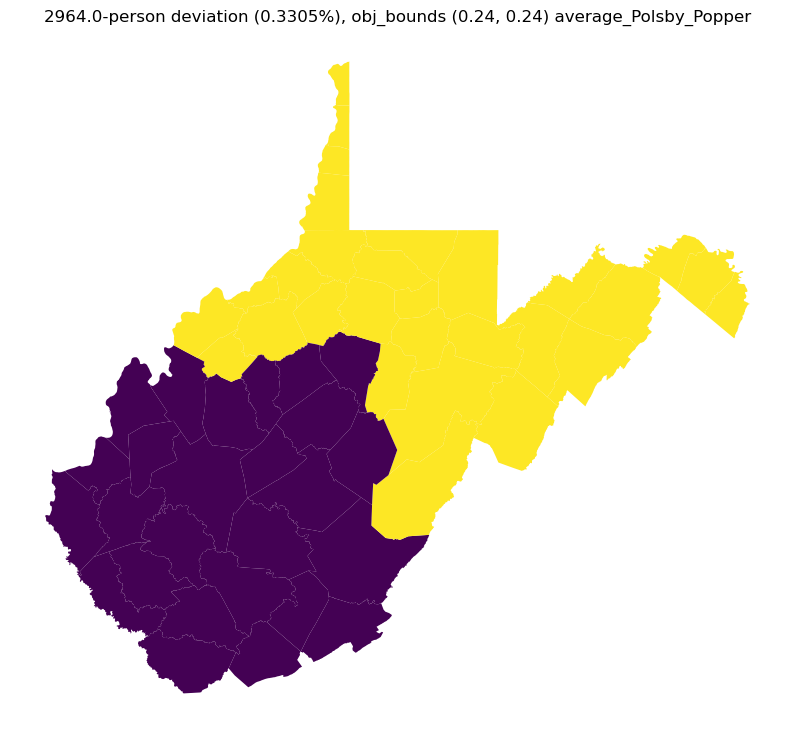

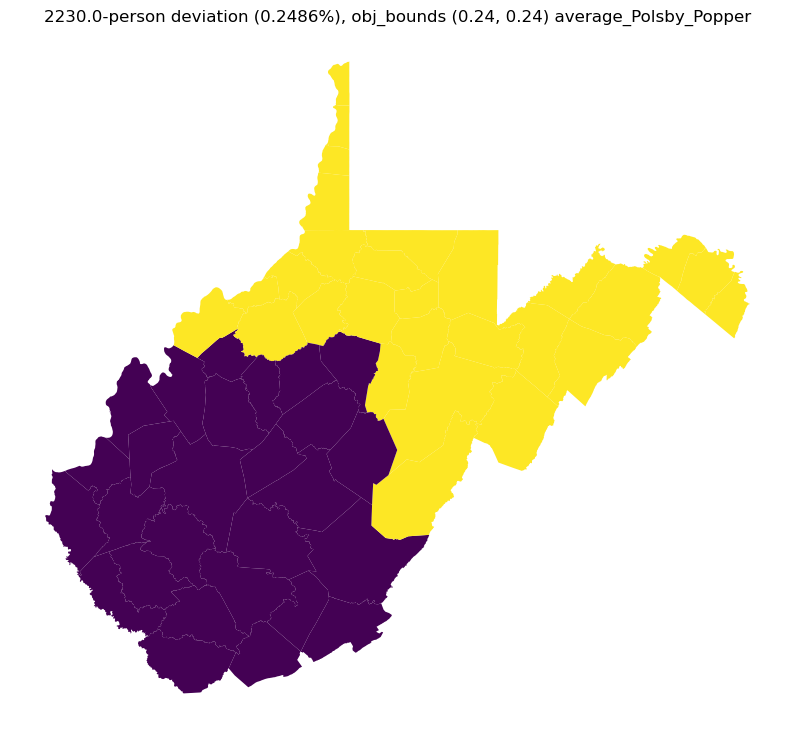

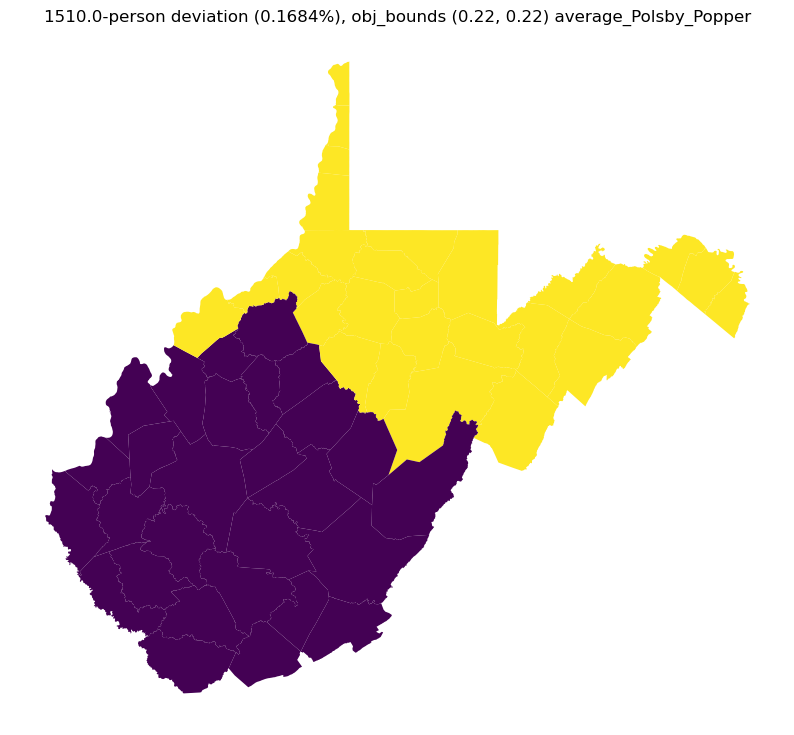

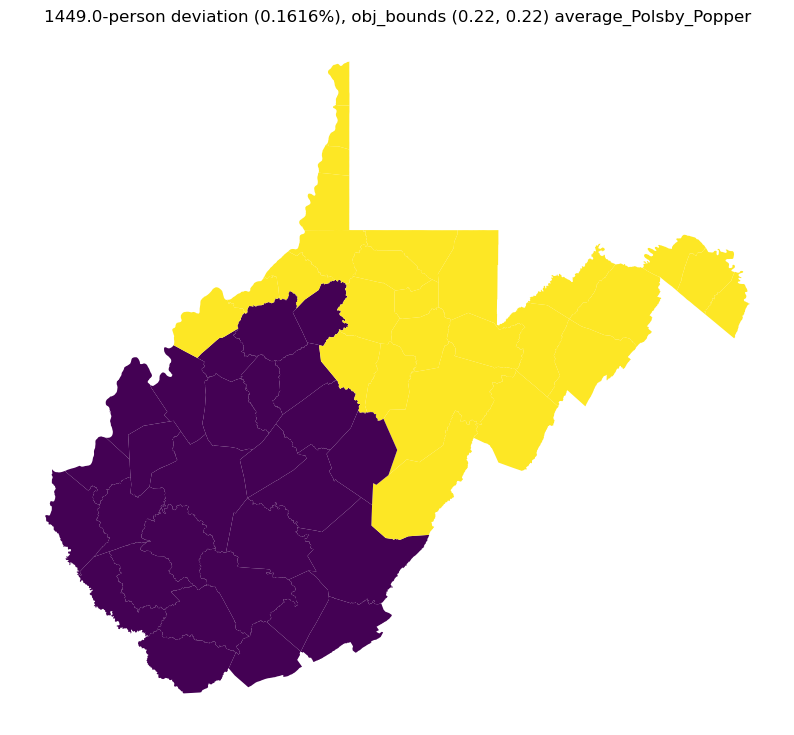

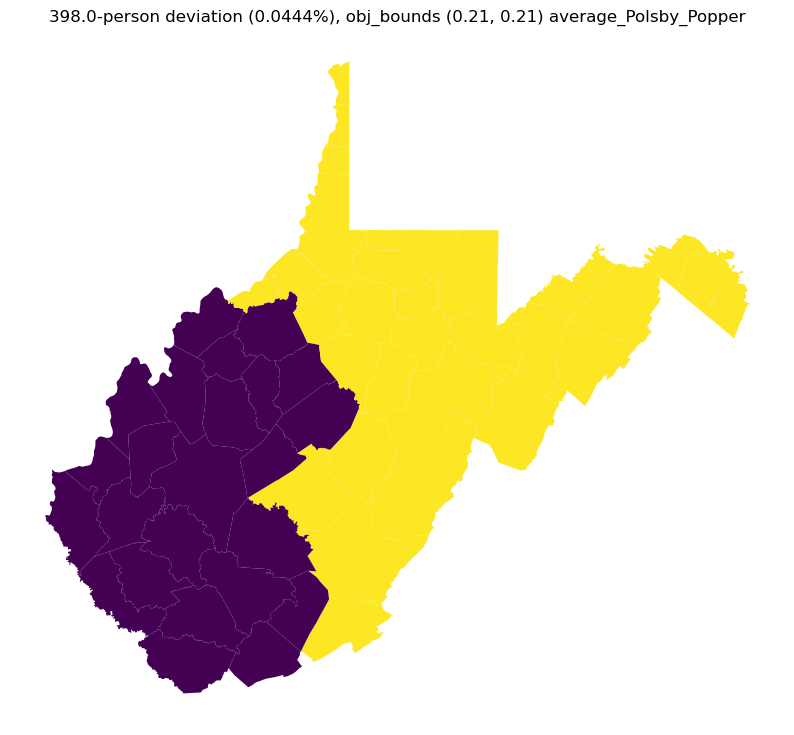

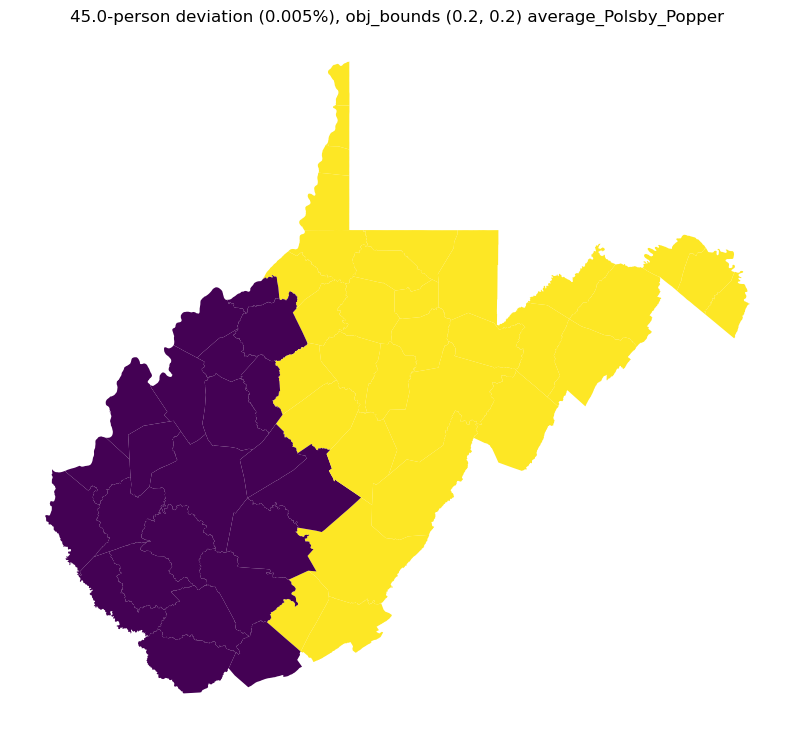

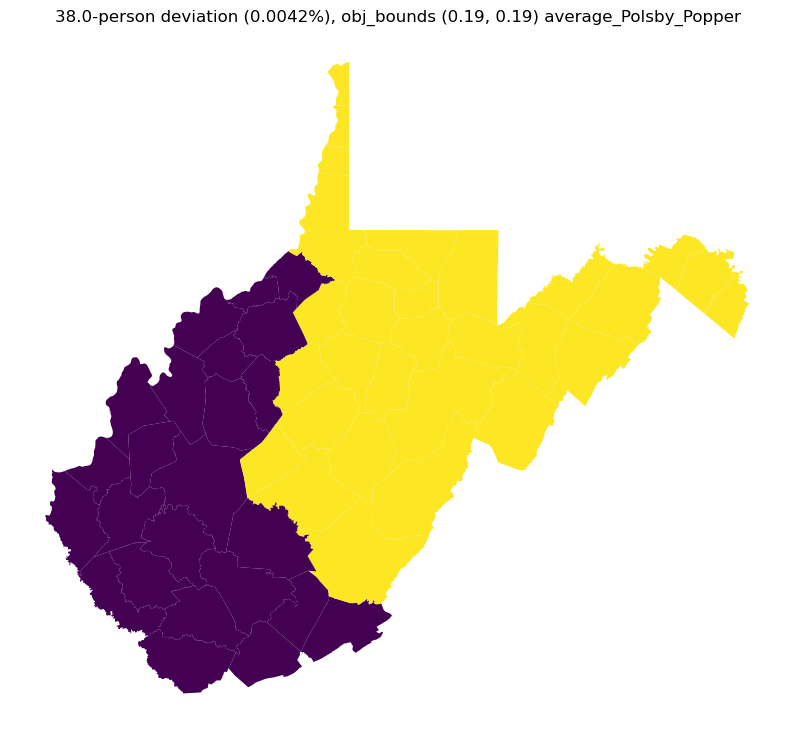

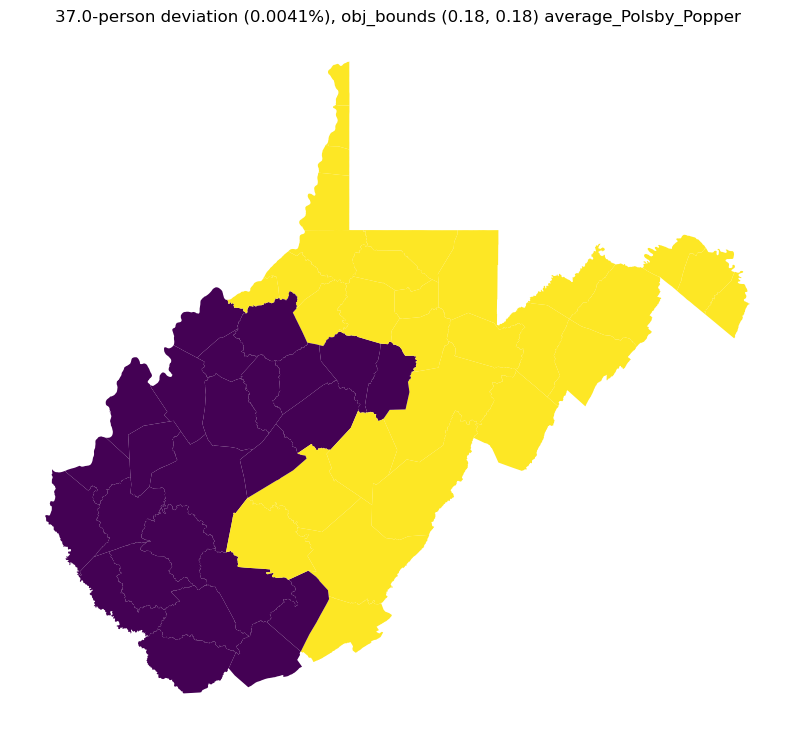

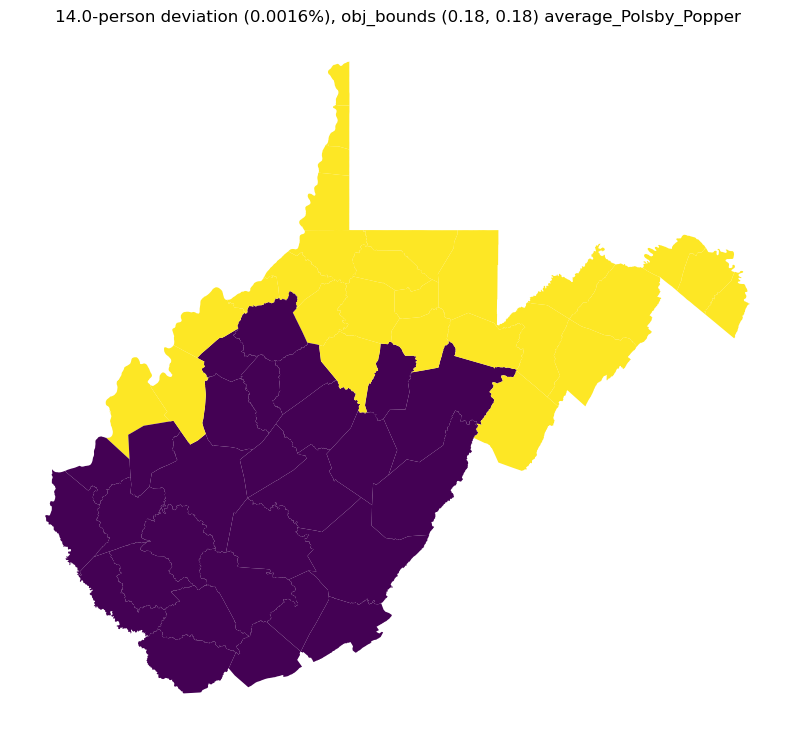

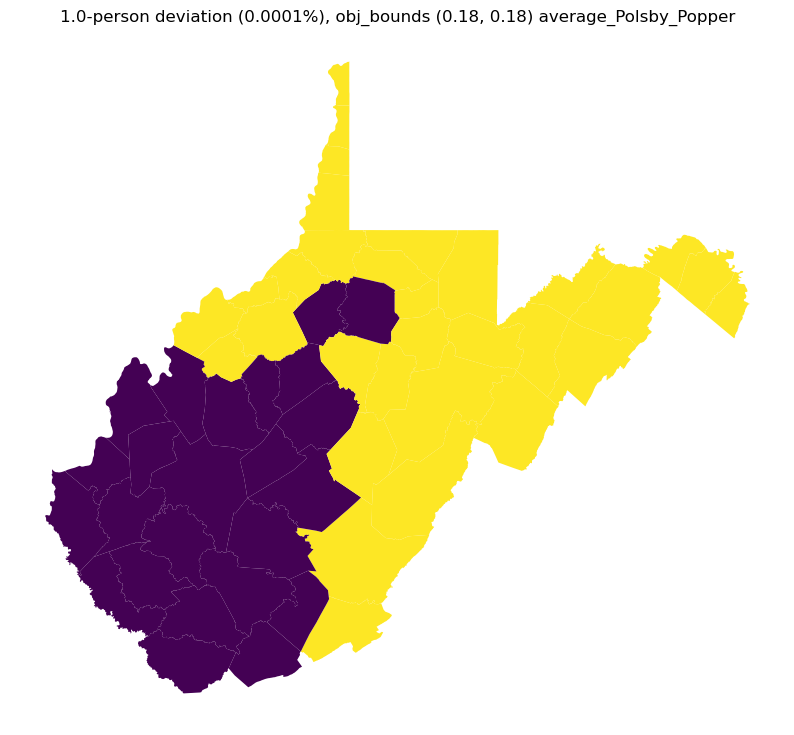

In [11]:
from draw import*

print(f"\n{'#' * 100}\nPareto maps for state {state},  objective {obj_type}\n{'#' * 100}\n")   
for plan, obj_bound, dev in result:
    title = f"{round(dev,2)}-person deviation ({round(100*dev/G._ideal_population,4)}%), obj_bounds {(round(obj_bound[0],2),round(obj_bound[1],2))} {obj_type}"
    draw_plan( filepath, filename2, G, plan, title=title, year=year )